# Actividad Evaluable: Patrones con K-means

Gael González Arbesú

1. Carga tus datos

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
dataframe = pd.read_csv("avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

In [66]:
dataframe[["year","Unnamed: 0", "XLarge Bags"]]

,year,Unnamed: 0,XLarge Bags
0,2015,0,0.0
1,2015,1,0.0
2,2015,2,0.0
3,2015,3,0.0
4,2015,4,0.0
...,...,...,...
18244,2018,7,0.0
18245,2018,8,0.0
18246,2018,9,0.0
18247,2018,10,0.0


In [67]:
dataFrameL=dataframe.drop(['year','Unnamed: 0','XLarge Bags'], axis=1)
dataFrameL

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic,WestTexNewMexico


Decidimos quitar year pues tenemos date y esta es más precisa de misma forma que podemos utilizar lo planteado por year dentro de date lo cual hace que no sirva para el analisis, de misma forma quitamos Unnamed: 0 y XLarge Bags pues los datos que muestras son simples 0 para XLarge Bags y unnamed 0 no tiene relevancia alguna.

3. Determina un valor de k

c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

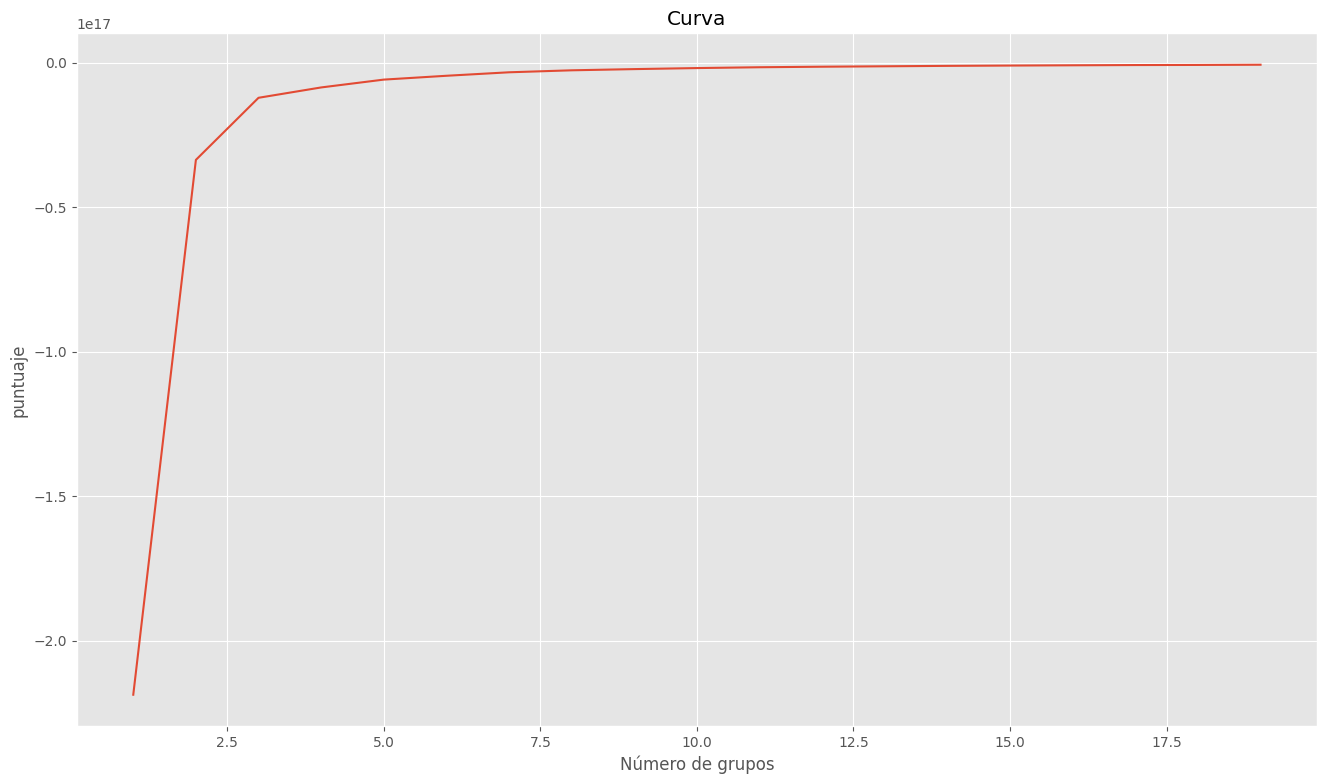

In [68]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Número de grupos")
plt.ylabel("puntuaje")
plt.title("Curva")
plt.show()

4. Utilizando scikitlearn calcula los centros del algoritmo k-means

In [69]:
kmeans = KMeans(n_clusters=3).fit(x)
centros = kmeans.cluster_centers_
print(centros)

[[1.43354656e+00 2.39568941e+05 1.77177989e+04]
 [1.09201183e+00 3.37350390e+07 2.06338732e+06]
 [1.09252680e+00 4.44383736e+06 2.64705173e+05]]


c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Distancia entre cada centro:

In [72]:
# Centros
centros = np.array([[1.43348274e+00, 2.39945856e+05, 1.77283468e+04],
                      [1.09201183e+00, 3.37350390e+07, 2.06338732e+06],
                      [1.09256332e+00, 4.44866415e+06, 2.65138020e+05]])
# Calcular la distancia entre cada par de centroides
num_centros = len(centros)
distances = np.zeros((num_centros, num_centros))
for i in range(num_centros):
    for j in range(num_centros):
        if i != j:
            distance = np.linalg.norm(centros[i] - centros[j])
            distances[i][j] = distance
# Mostrar la matriz de distancias
print("Matriz de Distancias entre Centroides:")
print(distances)
# Encontrar los centroides más cercanos entre sí
min_distance = np.min(distances[distances > 0])
closest_centros = np.where(distances == min_distance)
centro1, centro2 = closest_centros[0][0], closest_centros[1][0]
print(f"Los centros más cercanos son el Centro {centro1} y el Centro {centro2} con una distancia de {min_distance}.")


Matriz de Distancias entre Centroides:
[[       0.         33557502.66870093  4215984.01617503]
 [33557502.66870093        0.         29341531.18703356]
 [ 4215984.01617503 29341531.18703356        0.        ]]
Los centros más cercanos son el Centro 0 y el Centro 2 con una distancia de 4215984.016175028.


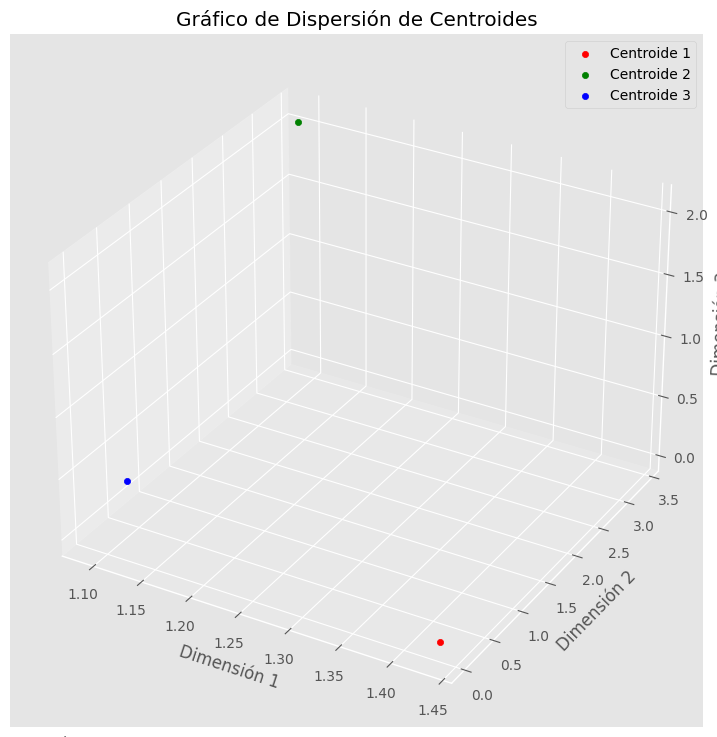

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Datos de los centroides
centros = np.array([[1.43350739e+00, 2.39819738e+05, 1.77284839e+04],
                    [1.09201183e+00, 3.37350390e+07, 2.06338732e+06],
                    [1.09250767e+00, 4.44705912e+06, 2.64946524e+05]])

# Etiquetas de los centroides
etiquetas = ['Centroide 1', 'Centroide 2', 'Centroide 3']

# Nombres de las dimensiones
dimensiones = ['Dimensión 1', 'Dimensión 2', 'Dimensión 3']

# Crear una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores para cada centroide
colores = ['r', 'g', 'b']

# Iterar a través de los centroides
for i in range(len(centros)):
    centroide = centros[i]
    etiqueta = etiquetas[i]
    color = colores[i]
    # Agregar un punto en el gráfico de dispersión para cada centroide
    ax.scatter(centroide[0], centroide[1], centroide[2], c=color, label=etiqueta)
# Etiquetas de los ejes y título
ax.set_xlabel(dimensiones[0])
ax.set_ylabel(dimensiones[1])
ax.set_zlabel(dimensiones[2])
ax.set_title('Gráfico de Dispersión de Centroides')

# Mostrar la leyenda
ax.legend()
# Mostrar el gráfico
plt.show()